This notebook is an introduction to linear regression, and how to do linear regression in Python with the ```statsmodels``` package. The output produced by ```statsmodels``` can be somewhat overwhelming at first, so we go through it in detail.

# Example: Hinton's study time data again

Here is again that somewhat pedagogical (and completely made-up) data about the relation between time spent studying and exam scores from the Hinton book.

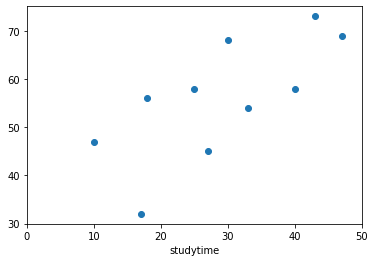

In [1]:
import pandas as pd

studytime_df = pd.DataFrame({ "studytime" : [40,43,18,10,25,33,27,17,30,47],
                              "examscore" : [58,73,56,47,58,54,45,32,68,69]})
%matplotlib inline
studytime_df.plot(x = "studytime", y = "examscore", 
                  style= "o", legend = False, xlim = (0, 50));

In linear regression, we try to estimate a *linear* relationship between variables -- in this case between study time and exam scores. What could that linear relationship be? Here are some guesses. Which of them should it be?

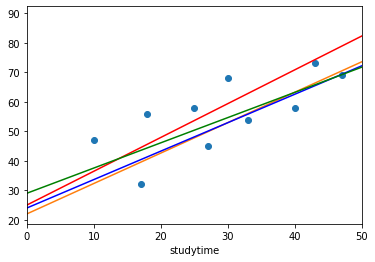

In [2]:
plot_obj = studytime_df.plot(x = "studytime", y = "examscore", 
                      style= "o", legend = False, xlim = (0, 50))

# here are some guesses where the line might be
# each line is specified through first two x coordinates,
# then two y coordinates.
# The line then goes through (x1, y1) and (x2, y2)
plot_obj.plot([0.0, 55], [25,88], "r")
plot_obj.plot([0.0, 65], [22,89])
plot_obj.plot([0.0, 55], [24,77], "b")
plot_obj.plot([0.0, 55], [29,76], "g");

We want to find the line that *minimizes the error*, that is, the line that is as close as possible, on the y axis, to all the blue dots. We make this concrete by measuring squared distances between the actual y values (below called Y) and the "predicted" y values (below called Y'), that is, the ones on the line.

In linear regression, we assume that the Y values stand in a linear relation to the X values, given a bit of error:

$Y = regression(X) + Error = Y' + Error = \beta_0 + \beta_1\cdot X + Error$

We want to choose $\beta_0$ and $\beta_1$ such that we overall minimize squared error 

$\sum Error^2 = \sum (Y - Y')^2 = \sum(Y - (\beta_0 + \beta_1X))^2$

We are looking for the line with the *least* sum of *squares* -- squared error, that is. So what we are aiming to do is *ordinary least squares* regression.

We can ask Python to do this for us. There are a number of Python packages that can do this, including scipy.stats (which we used for correlation), scikit.learn, and statsmodels. The one in scipy is too restricted (one predictor only), the one in scikit.learn is very clunky to use -- but the one in statsmodels is good. It gives us access not only to the best predicted line, but also to a number of hypothesis tests that help us see how good our regression model really is.

Here is how to use it:

In [3]:
import statsmodels.formula.api as smf

ols_obj = smf.ols("examscore ~ studytime", data= studytime_df).fit()
ols_obj

We used the function ```ols()``` for Ordinary Least Squares regression. As its parameter ```data``` we pass in the whole studytime data frame. We specify the regression model that we want to build as a formula given as a string: ```"examscore ~ studytime"```. We want to predict exam score from study time. The function gives us back an object, which we can inspect using the function ```summary()```:

In [4]:
ols_obj.summary()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              examscore   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     8.647
Date:                Thu, 15 Apr 2021   Prob (F-statistic):             0.0187
Time:                        11:10:15   Log-Likelihood:                -35.205
No. Observations:                  10   AIC:                             74.41
Df Residuals:                       8   BIC:                             75.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.4057      7.893      4.359      0.002      16.205      52.606
studytime      0.7446      0.253      2.941      0.019       0.161       1.329
==============================================================================
Omnibus:                        0.976   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.745
Skew:                          -0.388   Prob(JB):                        0.689
Kurtosis:                       1.911   Cond. No.                         85.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This summary is quite overwhelming with its sea of numbers. Let's break it down into manageable portions. We first give an overview of the tables, then go into more details below.

The first table starts with a reminder of what the model is: The dependent variable (what we were trying to predict) is ```examscore```. This is an OLS (ordinary least squares regression) model, computed via the Least Squares method. The date and time of our computation is given, and the number of data points:10.

On the right-hand side of the first table are some tests for the overall quality of our model.

The second table contains the regression line, described by the intercept ($\beta_0$) and the slope ($\beta_1$). The values of the two coefficients are given in the column named 'coef'. The other columns of this table test whether the coefficients are really different from zero. 

The third table contains further analyses of the model, including an analysis of the residuals (difference between predicted and observed Y values).


# The coefficients

The first thing we want to know is what the model says about the relation between study time and exam score. For this, look at the coefficients in the second table. The intercept $b_0$ is 34.4, and the slope $b_1$ for the predictor ```studytime``` is 0.7446. Here is what this means: 
* An intercept of 34.4 means that the y value for an x value of 0 is 34.4. That is, this model predicts that someone who studies zero minutes will have an exam score of 34.4. 
* The slope is 0.7446. The first thing to note about this is that this is a number greater zero, that means the slope goes upwards: The greater the study time, the greater the exam score. In more detail, it says that for each increase of 1 unit in study time, the model predicts an increase of 0.7446 points on the exam.

The intercept and the slope together make a line. This line hits the y axis at a y value of 34.4, so it goes through the coordinates (0. 34.4), and it rises 0.7446 units for each unit we go to the right. This is the best line, the best linear relation, that the model estimated. We can add this line to our scatter plot of points.

We can read the coefficients off the output of ```summary()```, but we can also access them directly in the ```ols_obj``` object:

In [5]:
ols_obj.params

Intercept    34.405675
studytime     0.744632
dtype: float64

Let's add the regression line to the plot.

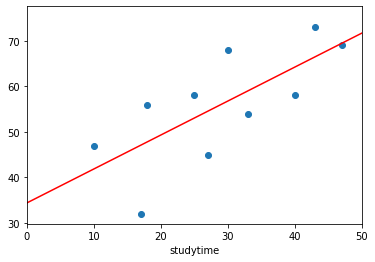

In [6]:
plot_obj = studytime_df.plot(x = "studytime", y = "examscore", 
                      style= "o", legend = False, xlim = (0, 50))

# Grab the intercept and slope from the ols object
intercept = ols_obj.params[0]
slope = ols_obj.params[1]

# We specify the line through two sets of coordinates.
coord1 = [0.0, intercept]
coord2 = [55, intercept + slope * 55]

# we hand the coordinates to plot():
# first both x values, then bothy values
plot_obj.plot([coord1[0], coord2[0]], [coord1[1], coord2[1]], "r");

# Residuals

The regression model predicts values $Y'$ for each X, namely $\beta_0 + \beta_1\cdot X$. Here is where to find them in the output object:

In [7]:
ols_obj.fittedvalues

0    64.190951
1    66.424847
2    47.809049
3    41.851994
4    53.021472
5    58.978528
6    54.510736
7    47.064417
8    56.744632
9    69.403374
dtype: float64

Let's look at them alongside the actual $Y$ values:

In [8]:
pd.DataFrame({"observed":studytime_df.examscore, "predicted":ols_obj.fittedvalues})

observed  predicted
0        58  64.190951
1        73  66.424847
2        56  47.809049
3        47  41.851994
4        58  53.021472
5        54  58.978528
6        45  54.510736
7        32  47.064417
8        68  56.744632
9        69  69.403374

The *residuals* are the error terms: the differences between observed and predicted Y values. You can get them from the ols result object, or compute them yourself:

In [9]:
print("Residuals:\n", ols_obj.resid)
print("Which is the same as:\n ", studytime_df.examscore - ols_obj.fittedvalues)

Residuals:
 0    -6.190951
1     6.575153
2     8.190951
3     5.148006
4     4.978528
5    -4.978528
6    -9.510736
7   -15.064417
8    11.255368
9    -0.403374
dtype: float64
Which is the same as:
  0    -6.190951
1     6.575153
2     8.190951
3     5.148006
4     4.978528
5    -4.978528
6    -9.510736
7   -15.064417
8    11.255368
9    -0.403374
dtype: float64


One of the assumptions underlying linear regression is that the residuals are approximately normally distributed, with a mean of 0. The reason is that we want the errors (the difference between predictions and observations) to be random, with no systematicity in them. We want the regression model to capture the regularity in the data, and we want the remaining error to be just that -- noise in the data, without regularities in it. When the error diverges from this assumption, we cannot really trust the results we got.

(This is particularly bad when we have few samples. When we have a large number of samples, we can get away with residuals whose distribution diverges more from normality.)

How can we figure out whether this assumption is met? One thing we can do is to inspect the residuals. Here is a first, rough look at the median and quartiles of the residuals. Ideally, we want the median to be close to zero, and the first and third quartiles at the same distance from zero.

In [10]:
residual_series = pd.Series(ols_obj.resid)
print("Inspecting the residuals.")
print("Minimum:", residual_series.min(), "1st quartile:", residual_series.quantile(0.25),
     "median:", residual_series.median(), "3rd quartile:", residual_series.quantile(0.75),
      "maximum:", residual_series.max())

Inspecting the residuals.
Minimum: -15.064417177914123 1st quartile: -5.887845092024541 median: 2.2875766871165624 3rd quartile: 6.218366564417181 maximum: 11.255368098159508


The median is a bit higher than we would like it to be. Let's look more closely, by doing a density plot of the residuals.

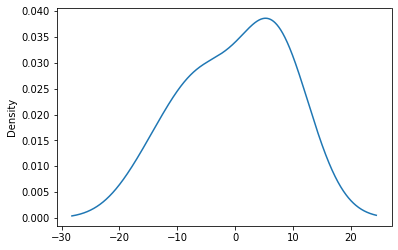

In [11]:
pd.Series(ols_obj.resid).plot.density();

This looks somewhat normal-ish, though not very closely. We can again formulate this as a hypothesis test: Is this far enough away from being normal that it doesn't count as normal anymore?

The output of summary() has two hypothesis tests for this. The first is the Omnibus test for normality, shown in the lines "Omnibus" and "Prob(Omnibus)". We get a p-value of 0.64 -- no, this does not count as approximately normal. The second is the Jarque-Bera test in the lines "Jarque-Bera (JB)" and "Prob(JB)" -- and again the answer is no, the residuals are not approximally normally distributed. 

But then, we also have a very low number of data points.



# Are the coefficients really different from zero?

When the slope is zero, that means there is no correlation between the predictor and the dependent variable (in the study time data, these are study time and exam score). Like when we measure correlation, we want to check the hypothesis that the predictor does have predictive value, that there is some correlation between it and the dependent variable. 

For all coefficients, the slope as well as the intercept, a two-tailed t-test is done. The null hypothesis, again, is that the coefficient is really zero. The mean under the null hypothesis is 0, and the observed sample mean is the slope, $\beta_1$. Here, again, is the summary of the regression models:

In [12]:
ols_obj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              examscore   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     8.647
Date:                Thu, 15 Apr 2021   Prob (F-statistic):             0.0187
Time:                        11:10:15   Log-Likelihood:                -35.205
No. Observations:                  10   AIC:                             74.41
Df Residuals:                       8   BIC:                             75.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.4057      7.893      4.359      0.002      16.205      52.606
studytime      0.7446      0.253      2.941      0.019       0.161       1.329
==============================================================================
Omnibus:                        0.976   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.745
Skew:                          -0.388   Prob(JB):                        0.689
Kurtosis:                       1.911   Cond. No.                         85.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the same table as the coefficients, we see the standard error and the t statistic for each coefficient, and the probability of observing the data under the null hypothesis. The p-value, as expected, is the same that we got when we measured correlation of study time and exam score: 0.019, a low probability. So we can reject the null hypothesis and assume that there is a significant correlation between study time and exam score.  


# Amount of variance explained 

The R-squared value in top row of the right-hand side of the first table is Pearson's r squared. This indicates the fraction of variance in the data that is explained by the model.

Remember our discussion of effect size? For linear regression models, R-squared is an indicator of the effect size.

The R-squared value in the first row is exactly the same as the squared Pearson's r:

In [13]:
from scipy import stats

print("Here is the r-squared value:", ols_obj.rsquared)
print("which is the same as squared Pearson's r:", 
      stats.pearsonr(studytime_df.studytime,studytime_df.examscore)[0]**2)

Here is the r-squared value: 0.5194235464706296
which is the same as squared Pearson's r: 0.5194235464706295


The adjusted R-squared, or "Adj. R-squared", in the row below that is R-squared adjusted for the number of predictors. The more predictors we add, the better R-squared, but some of the
improvement may be due to chance. Adjusted R-squared tries to
correct for this, to get us a better estimate for how much of the variance in exam scores we are explaining through the predictor(s). 

# F-test: How good is the model overall?

Below the R-squared values in the right-hand column of the first table, you find an F-test: an F statistic, and a p-value. This is another hypothesis test. Its null hypothesis is that all coefficients (except the intercept) are equal to zero (basically, that the model is completely worthless). 

The F statistic is the ratio of the systematic variance in the model and the error variance, $F = \frac{systematic~variance}{error~variance}$. 

The systematic variance is the variance of the fitted values (predicted values). The error variance is the summed of squared residuals. The model is good when the error variance is relatively low compared to the systematic variance. 

When we have only one predictor, like we do here, the p-value of the F test is the same as the p-value of the t-test for the single predictor. (Which it is in the output of ```summary()```, with a bit of a rounding error.)

# An annotated sea of numbers

Here is the output of ```summary()``` on the result of ```ols``` again, with highlights on the parts we have discussed:

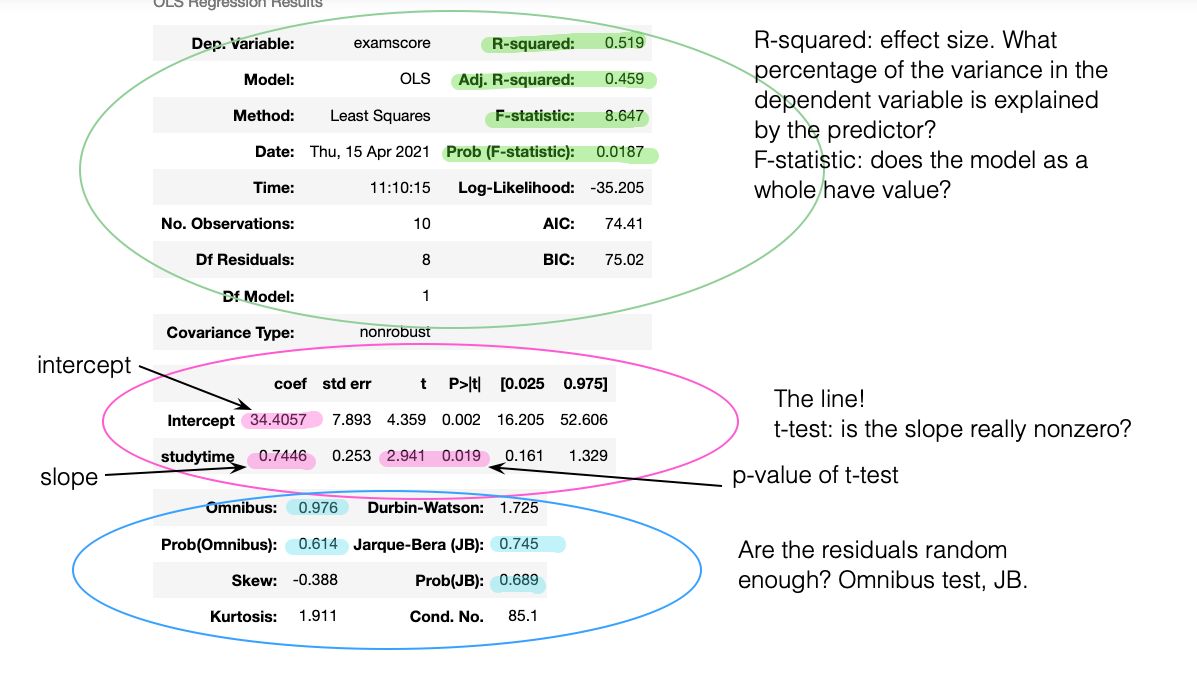


# Homoscedacity

Homoscedacity means that the relation between the predictor X and the dependent variable Y stays the same throughout all datapoints. When we do a linear regression model, we have to assume that this is true of our data. This is again the same assumption as above, that the errors are randomly distributed, and are just noise in the data. 

Outliers can have an oversize influence on the overall regression line that is computed. And when the data consists of several groups that behave differently, the overall regression line may not say much about the data. 

Hinton's example for this is the (again made-up) "smiling time" data, which charts the amount of time each shop assistant smiled against the number of items they sold. 

Here is the dataset in Python:

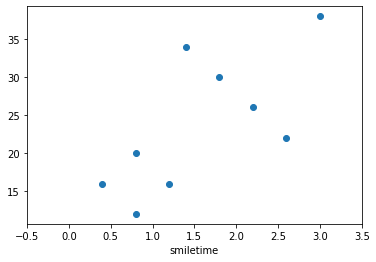

In [14]:
hinton_smile_df = pd.DataFrame({"smiletime": [0.4, 0.8, 0.8, 1.2, 1.4, 1.8, 2.2, 2.6, 3.0],
                                "sold": [16, 12, 20, 16, 34, 30, 26, 22, 38]})
hinton_smile_df.plot(x = "smiletime", y = "sold", 
                  style= "o", legend = False, xlim = (-0.5, 3.5));

As you can see clearly from the graph, this dataset consists of three distinct groups in which smiling time and sales have quite different relations. 

If we measure correlation over the whole dataset, we get the answer that there is a significant positive correlation between smiling time and sales:

In [15]:
stats.pearsonr(hinton_smile_df.smiletime, hinton_smile_df.sold)

(0.6940509915014164, 0.03806689894001187)

But if we leave out the last salesperson, the outlier with extremely high sales and smiling times, this correlation disappears:

In [16]:
stats.pearsonr(hinton_smile_df.iloc[:8].smiletime, hinton_smile_df.iloc[:8].sold)

(0.5199999999999999, 0.18650234880000008)

For the first four data points, we get exactly zero correlation:

In [17]:
stats.pearsonr(hinton_smile_df.iloc[:4].smiletime, hinton_smile_df.iloc[:4].sold)

(0.0, 1.0)

In data points 5 through 8 we have a perfect negative correlation: the more they smile, the less they sell.

In [18]:
stats.pearsonr(hinton_smile_df.iloc[4:8].smiletime, hinton_smile_df.iloc[4:8].sold)

(-0.9999999999999999, 1.1102230246251565e-16)

The moral of the story is: Don't run analyses over your data blindly. Know your data, and think about whether all assumptions are met for the analyses you want to do.

# Try it for yourself

On Canvas, you find a dataset called lexdec.csv, data with lexical decision times. In a lexical decision task, participants see either words (BROCCOLI) or non-words (BORCAULD) on a screen, and have to decide very fast whether the letters they see spell an actual word of the language or not. Lexical decision data is interesting as a window into people's mental lexicon because they react faster to some words than to others. One quite reliable effect is that people usually react more quickly to words that appear more frequently in the language. We will check on this effect using a lexical decision set by Harald Baayen, available on Canvas as ```lexdec.csv```. This is a portion of the ```lexdec``` data included in the languageR package for the language R (https://cran.r-project.org/web/packages/languageR/languageR.pdf). 

Please load this data into a Pandas data frame. It will have columns named "Word", "Frequency", and "meanRT", for mean reaction time across a number of participants. 

1. Do a scatter plot of frequency versus mean reaction time. Does it look like there is a correlation between frequency and mean reaction time?

2. Use ```statsmodels``` to fit a linear regression model that predicts mean reaction time from frequency, and inspect the resulting object with the ```summary()``` function. What does the model say about frequency and reaction time? Is reaction time higher or lower for words with higher frequency? 

3. Is the coefficient for frequency significantly different from zero? Where do you see this?

4. Inspect the residuals. Are they approximately normally distributed? How do you see this?

5. How much of the variance in reaction time is explained by the difference in frequency? Where do you see this?

6. How much value does the model have as a whole? What are ways to determine this?


In [19]:
import pandas as pd

lexdec_df = pd.read_csv("lexdec.csv")
lexdec_df.head()

Word  Frequency  meanRT
0     owl   4.859812  6.3582
1    mole   4.605170  6.4150
2  cherry   4.997212  6.3426
3    pear   4.727388  6.3353
4     dog   7.667626  6.2956

*Here is some space for your notes.*

By the way, if you would like to try a lexical decision task for yourself, here is one: https://www.psytoolkit.org/experiment-library/ldt.html